In [ ]:
import pandas as pd

df = pd.read_csv('references.csv')
top_referring_philosophers = df['author_of_book'].value_counts().head(20)
top_referenced_philosophers = df['full_author_referenced'].value_counts().head(20)


print("Top 20 Philosophers Who Made the Most References:")
print(top_referring_philosophers)
print("\nTop 20 Philosophers Who Were Referenced the Most:")
print(top_referenced_philosophers)


Top 20 Philosophers Who Made the Most References:
author_of_book
Grote, George                     13203
Tyerman, L. (Luke)                 4661
Hegel, Georg Wilhelm Friedrich     3777
Aquinas                            3736
Dewey                              2628
Frazer                             2598
Grisar, Hartmann                   2522
Schopenhauer, Arthur               2308
Ingersoll, Robert Green            2238
Nietzsche, Friedrich Wilhelm       2057
Blavatsky                          1890
Voltaire                           1849
Croce                              1800
Plutarch                           1731
Falckenberg                        1663
Westermarck, Edward                1646
Husik, Isaac                       1415
Mill, John Stuart                  1223
Santayana, George                  1214
Hume, David                        1214
Name: count, dtype: int64

Top 20 Philosophers Who Were Referenced the Most:
full_author_referenced
Plato                             1

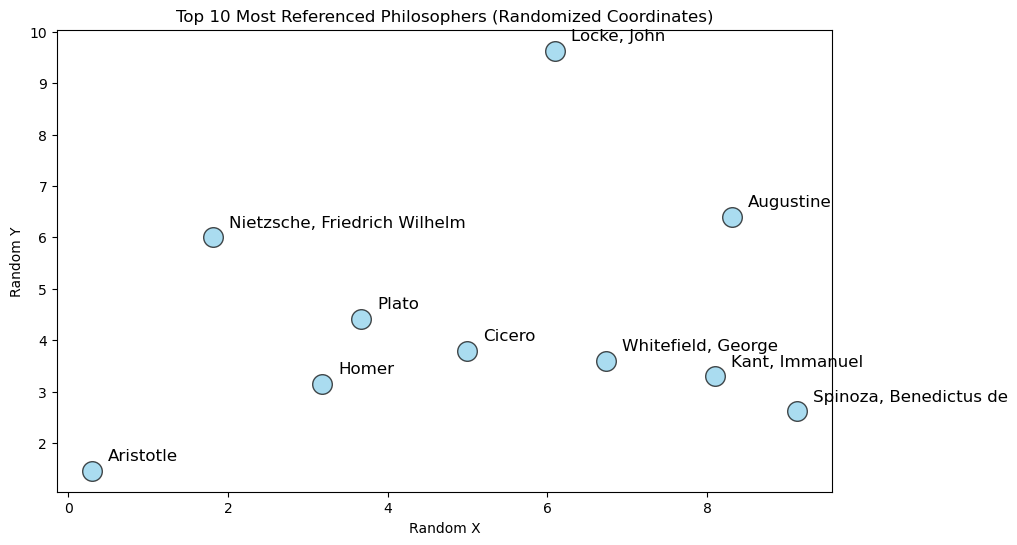

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

top_referenced_philosophers = df['full_author_referenced'].value_counts().head(10)
x_coords = np.random.rand(10) * 10
y_coords = np.random.rand(10) * 10
plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, s=200, c='skyblue', edgecolor='k', alpha=0.7)
for i, philosopher in enumerate(top_referenced_philosophers.index):
    plt.text(x_coords[i] + 0.2, y_coords[i] + 0.2, philosopher, fontsize=12)

plt.title('Top 10 Most Referenced Philosophers (Randomized Coordinates)')
plt.xlabel('Random X')
plt.ylabel('Random Y')
plt.show()

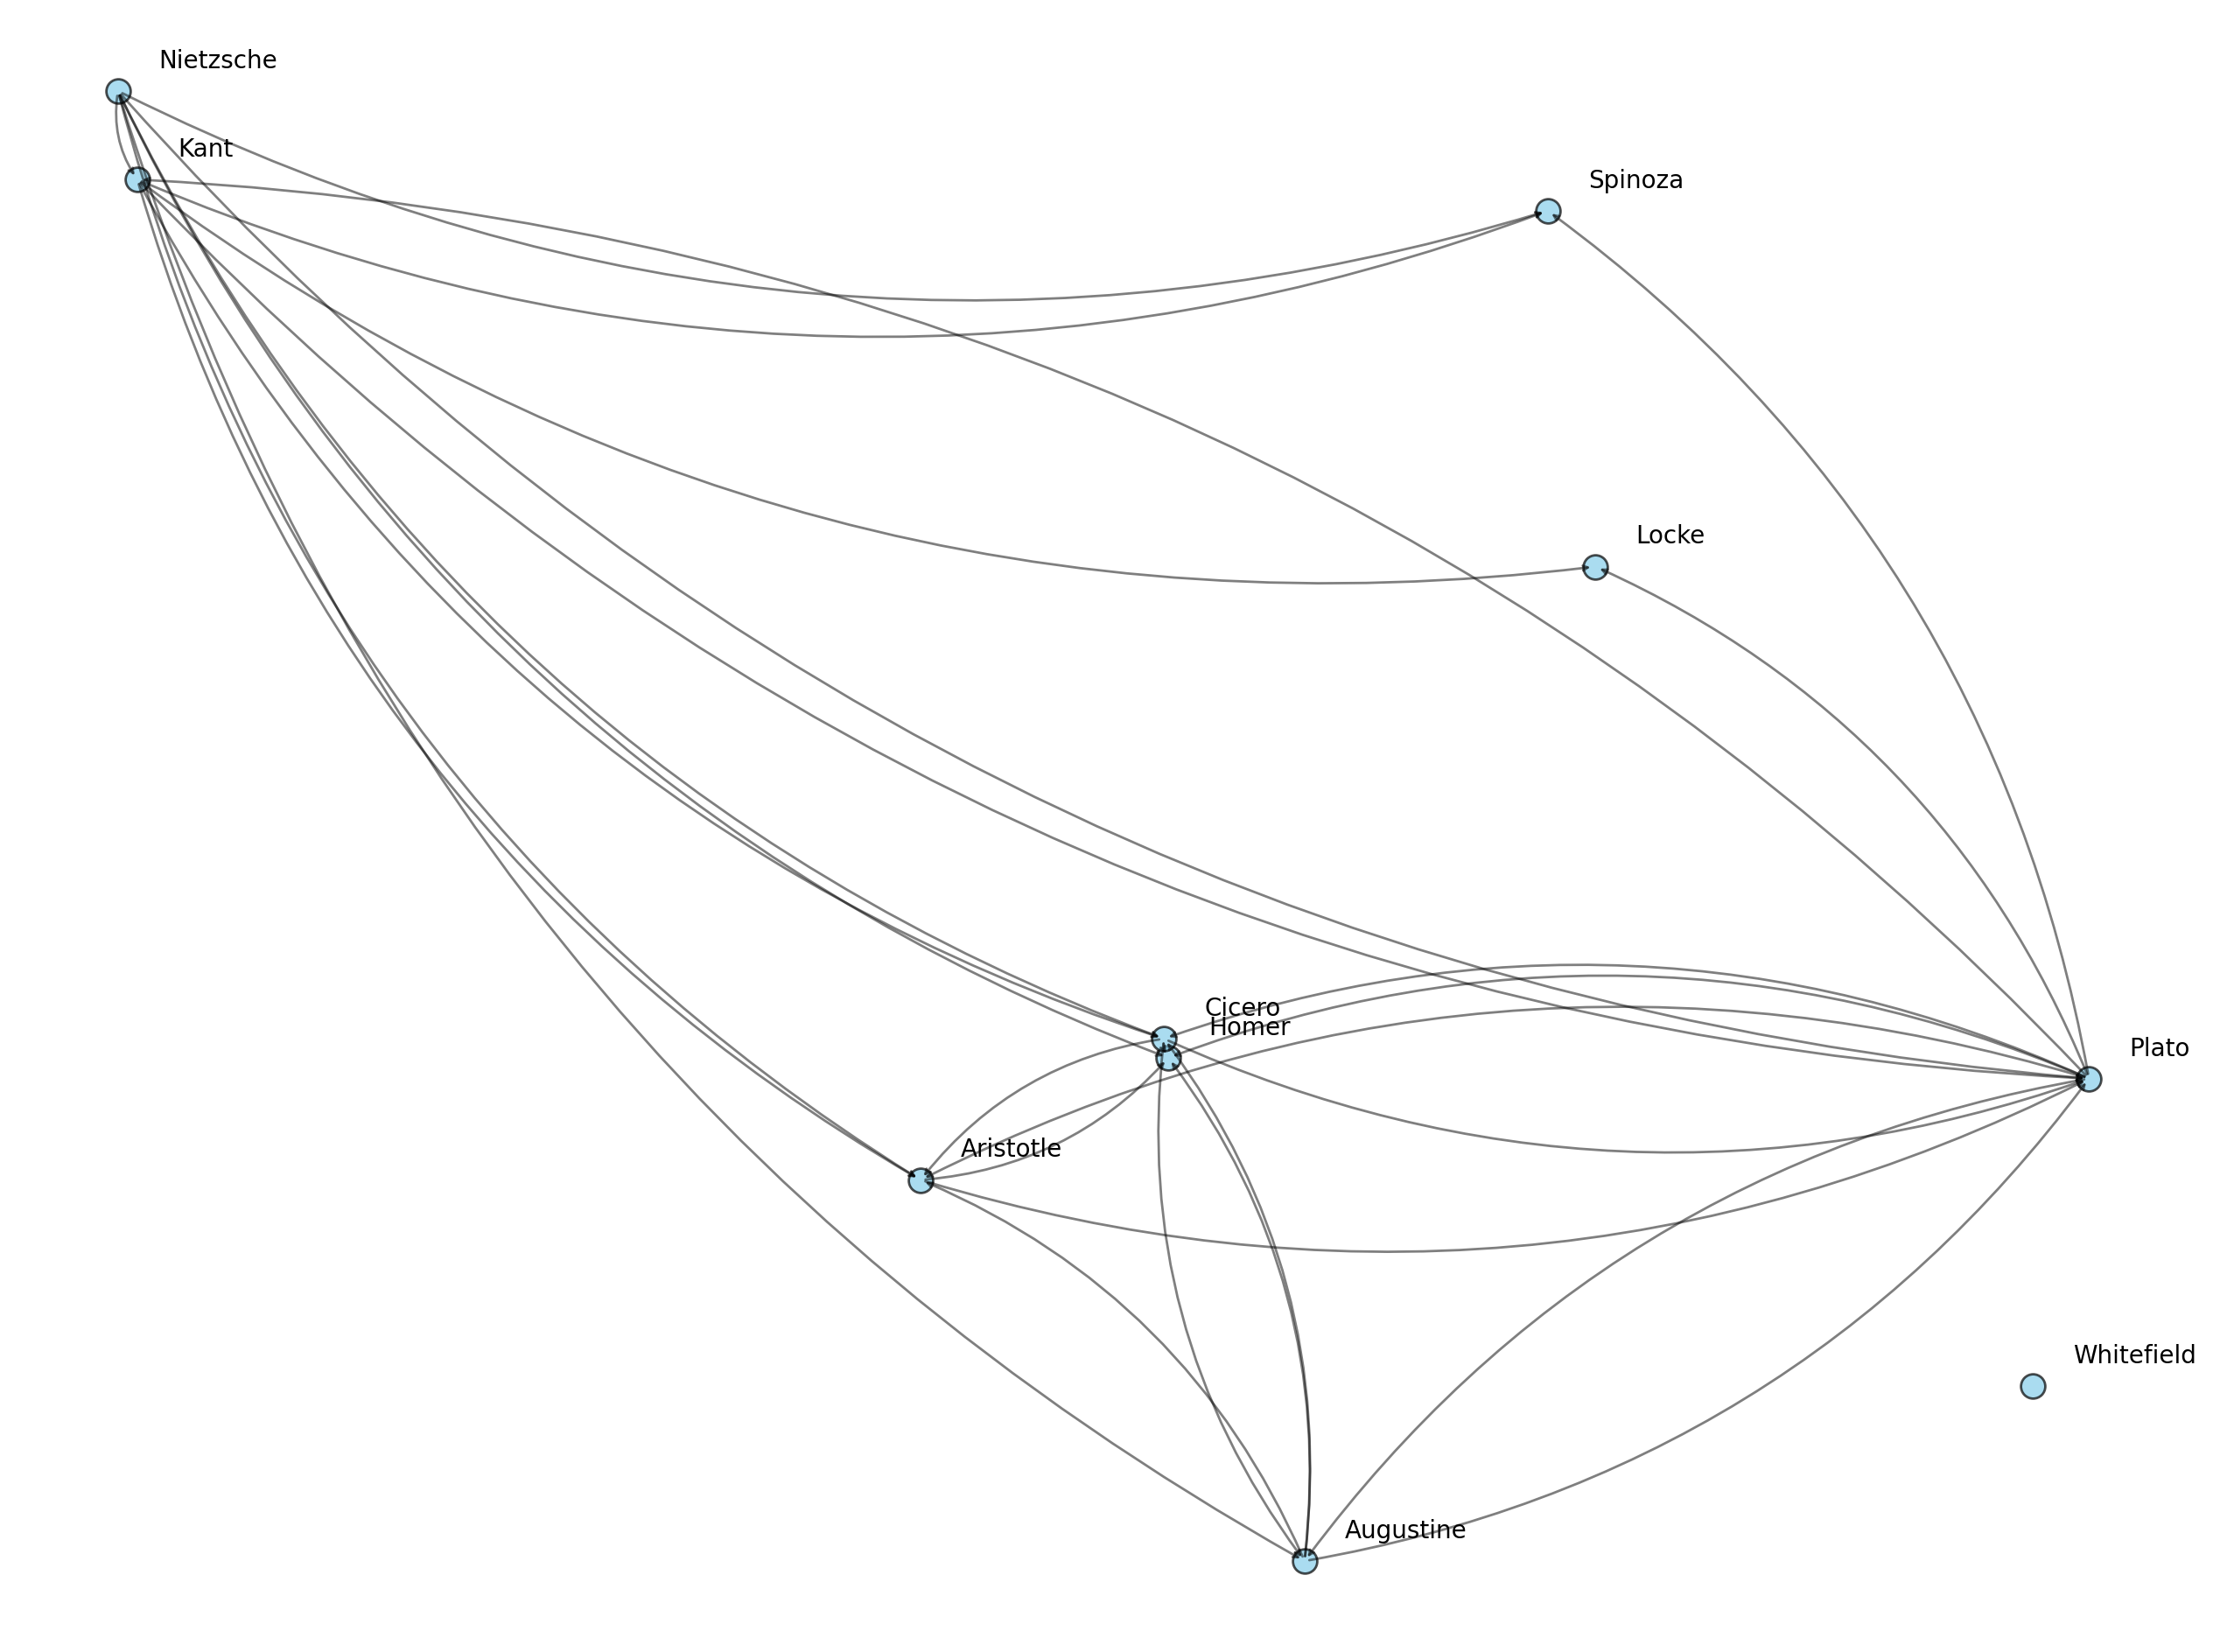

In [ ]:
df_filtered = df[
    (df['author_of_book'].isin(top_referenced_philosophers)) &
    (df['full_author_referenced'].isin(top_referenced_philosophers))
]


reference_counts = df_filtered.groupby(['author_of_book', 'full_author_referenced']).size()
coordinates = {philosopher: (np.random.rand() * 10, np.random.rand() * 10) for philosopher in top_referenced_philosophers}
plt.figure(figsize=(16, 12), dpi=200)


for philosopher, (x, y) in coordinates.items():
    first_name = philosopher.split()[0].rstrip(',')
    plt.scatter(x, y, s=100, c='skyblue', edgecolor='k', alpha=0.7)
    plt.text(x + 0.15, y + 0.15, first_name, fontsize=10)

# track unique connections to avoid multiple arrows
unique_connections = set()

for (source, target), count in reference_counts.items():
    if source != target and count > 5 and (source, target) not in unique_connections:
        unique_connections.add((source, target))
        source_coord = coordinates[source]
        target_coord = coordinates[target]

        arrow = FancyArrowPatch(
            posA=source_coord, posB=target_coord,
            connectionstyle="arc3,rad=0.2",
            arrowstyle="->,head_length=2,head_width=1",
            color='k',
            alpha=0.5,
            linewidth=1
        )
        plt.gca().add_patch(arrow)


plt.axis('off')
plt.show()

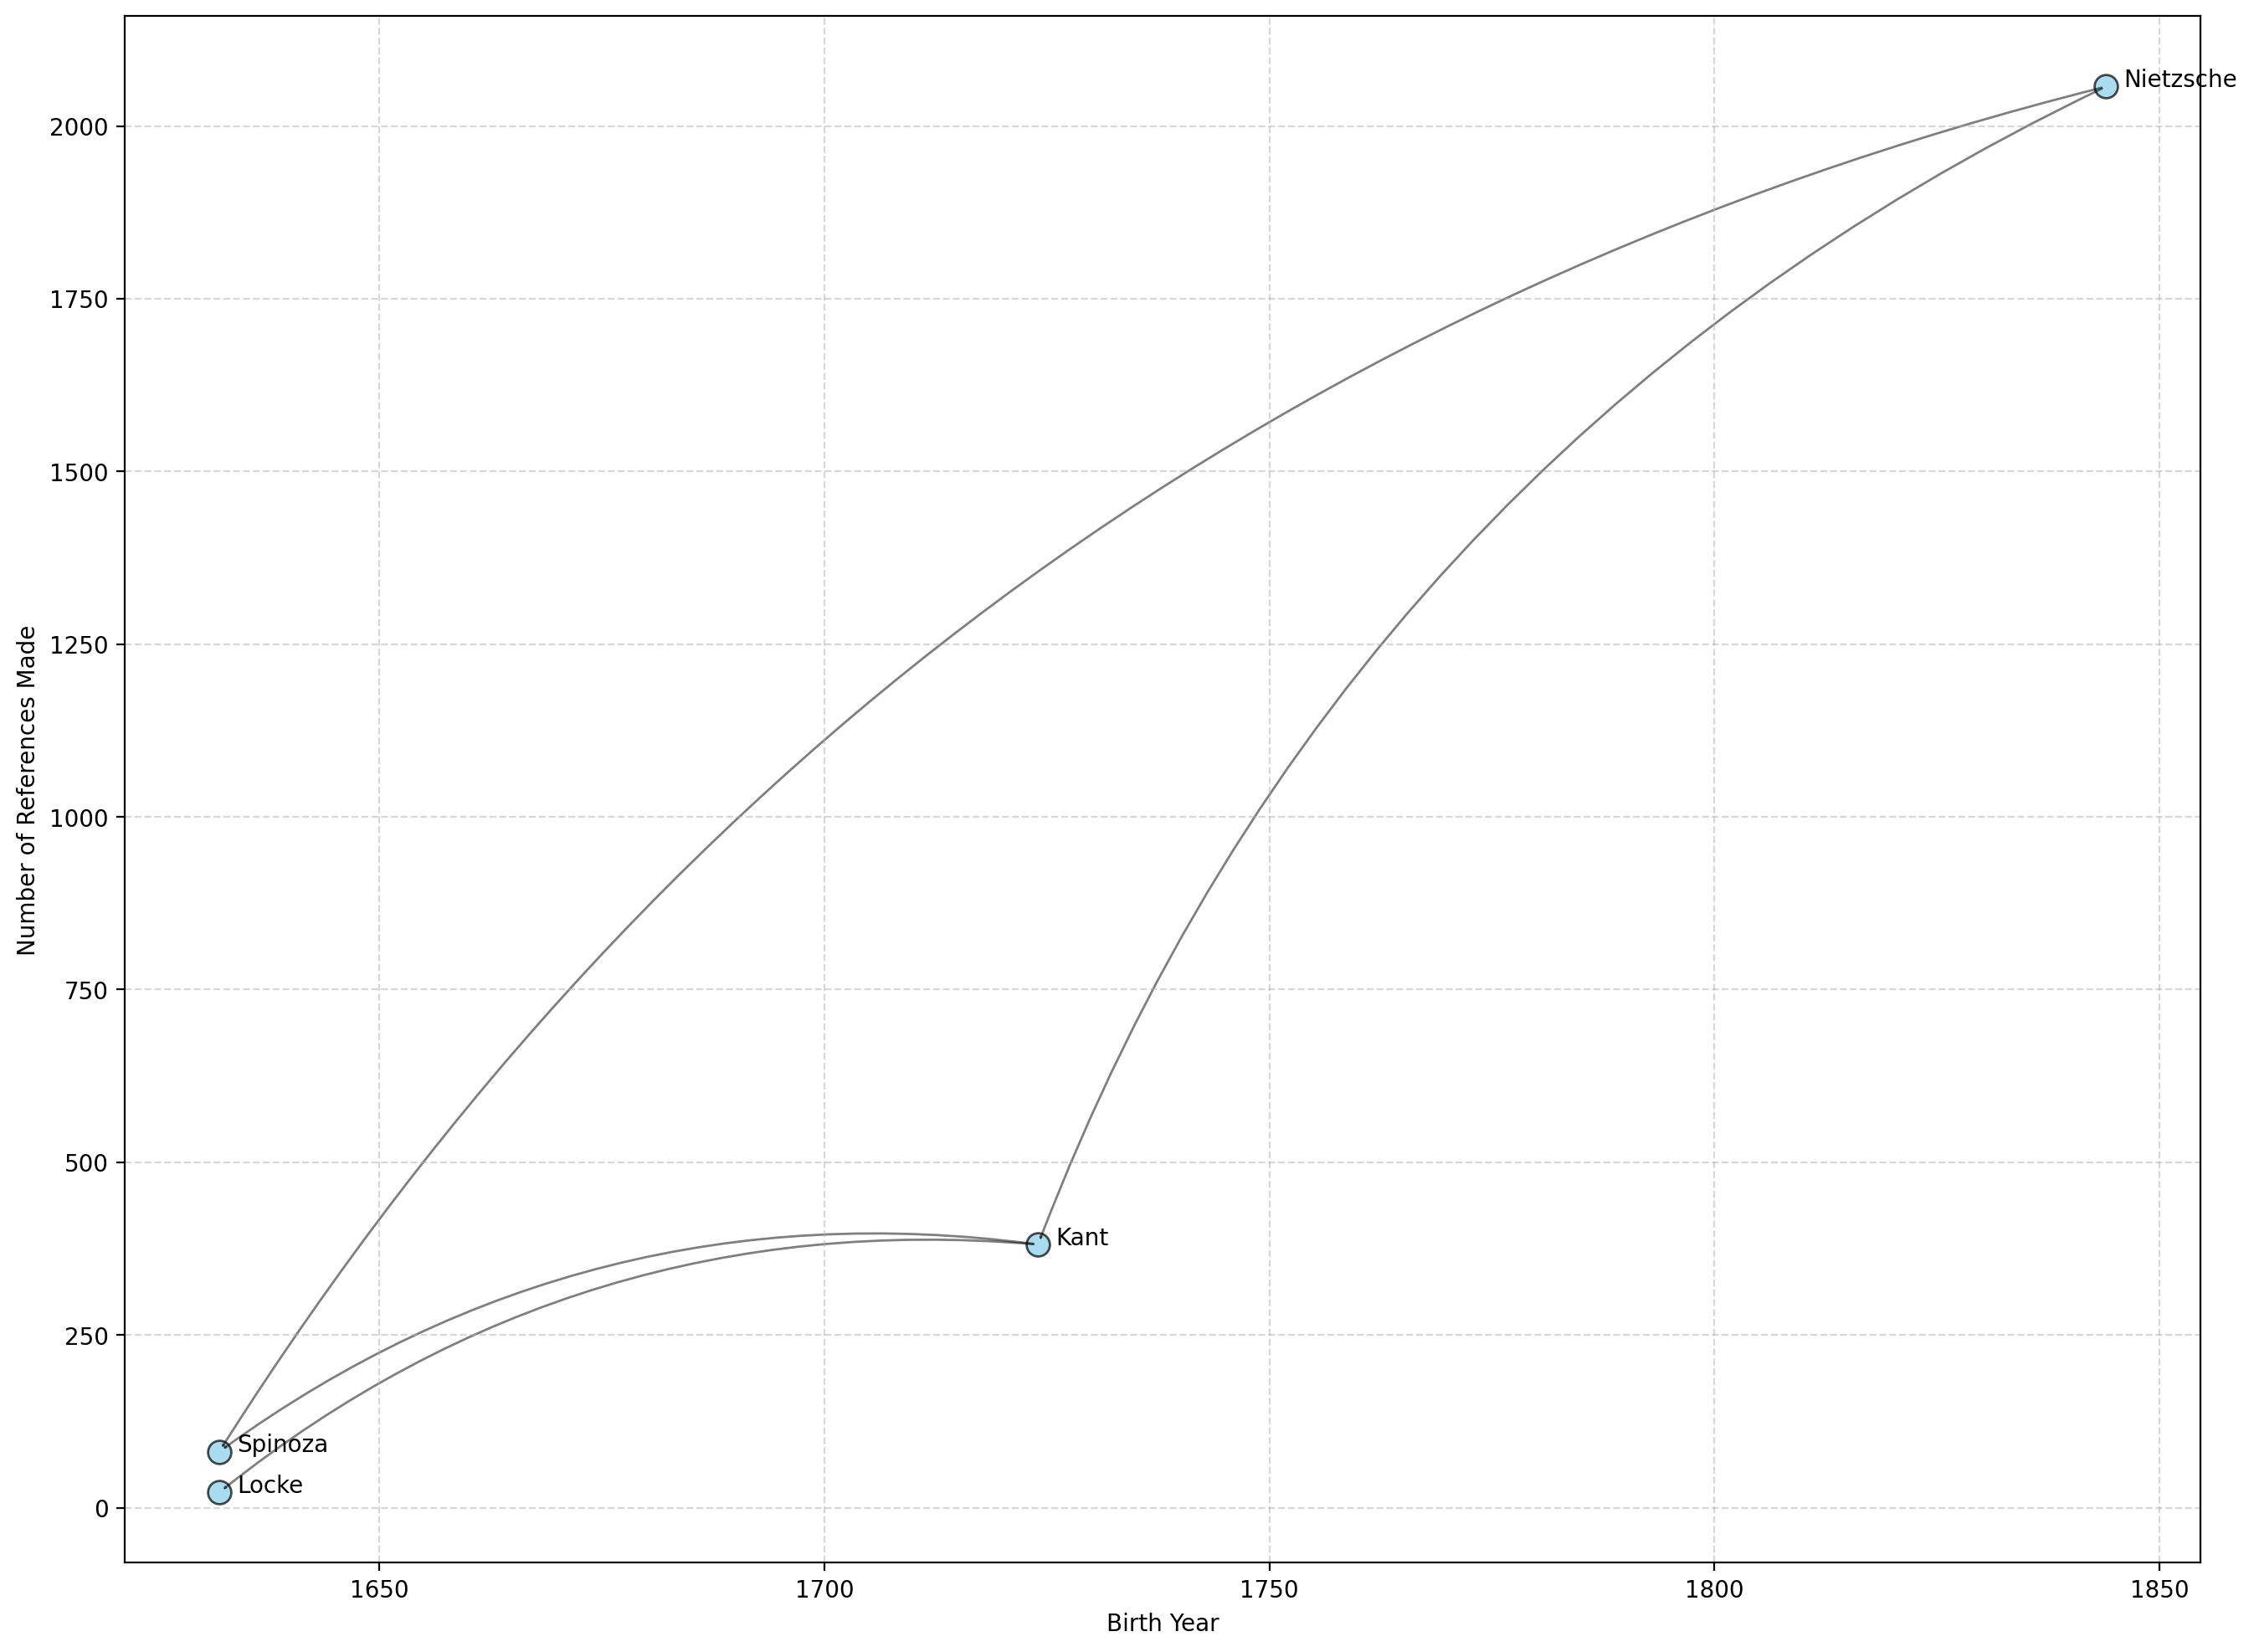

In [ ]:
df_filtered = df[
    (df['author_of_book'].isin(top_referenced_philosophers)) &
    (df['full_author_referenced'].isin(top_referenced_philosophers))
]

reference_counts = df['author_of_book'].value_counts()
coordinates = {}
for philosopher in top_referenced_philosophers:
    philosopher_rows = df[df['author_of_book'] == philosopher]
    if not philosopher_rows.empty and 'birth_year' in philosopher_rows.columns:
        birth_year = philosopher_rows['birth_year'].iloc[0]
        num_references = reference_counts.get(philosopher, 0)
        if pd.notna(birth_year) and np.isfinite(num_references):
            coordinates[philosopher] = (birth_year, num_references)

plt.figure(figsize=(16, 12), dpi=200) 
for philosopher, (x, y) in coordinates.items():
    first_name = philosopher.split()[0].rstrip(',')
    plt.scatter(x, y, s=100, c='skyblue', edgecolor='k', alpha=0.7)
    plt.text(x + 2, y, first_name, fontsize=10)
unique_connections = set()
reference_counts_pairs = df_filtered.groupby(['author_of_book', 'full_author_referenced']).size()

for (source, target), count in reference_counts_pairs.items():
    if source != target and count > 5 and (source, target) not in unique_connections:
        unique_connections.add((source, target))  

        if source in coordinates and target in coordinates:
            source_coord = coordinates[source]
            target_coord = coordinates[target]
            
            arrow = FancyArrowPatch(
                posA=source_coord, posB=target_coord,
                connectionstyle="arc3,rad=0.2", 
                arrowstyle="->,head_length=0.4,head_width=0.2",
                color='k',
                alpha=0.5,
                linewidth=1
            )
            plt.gca().add_patch(arrow)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Birth Year")
plt.ylabel("Number of References Made")
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

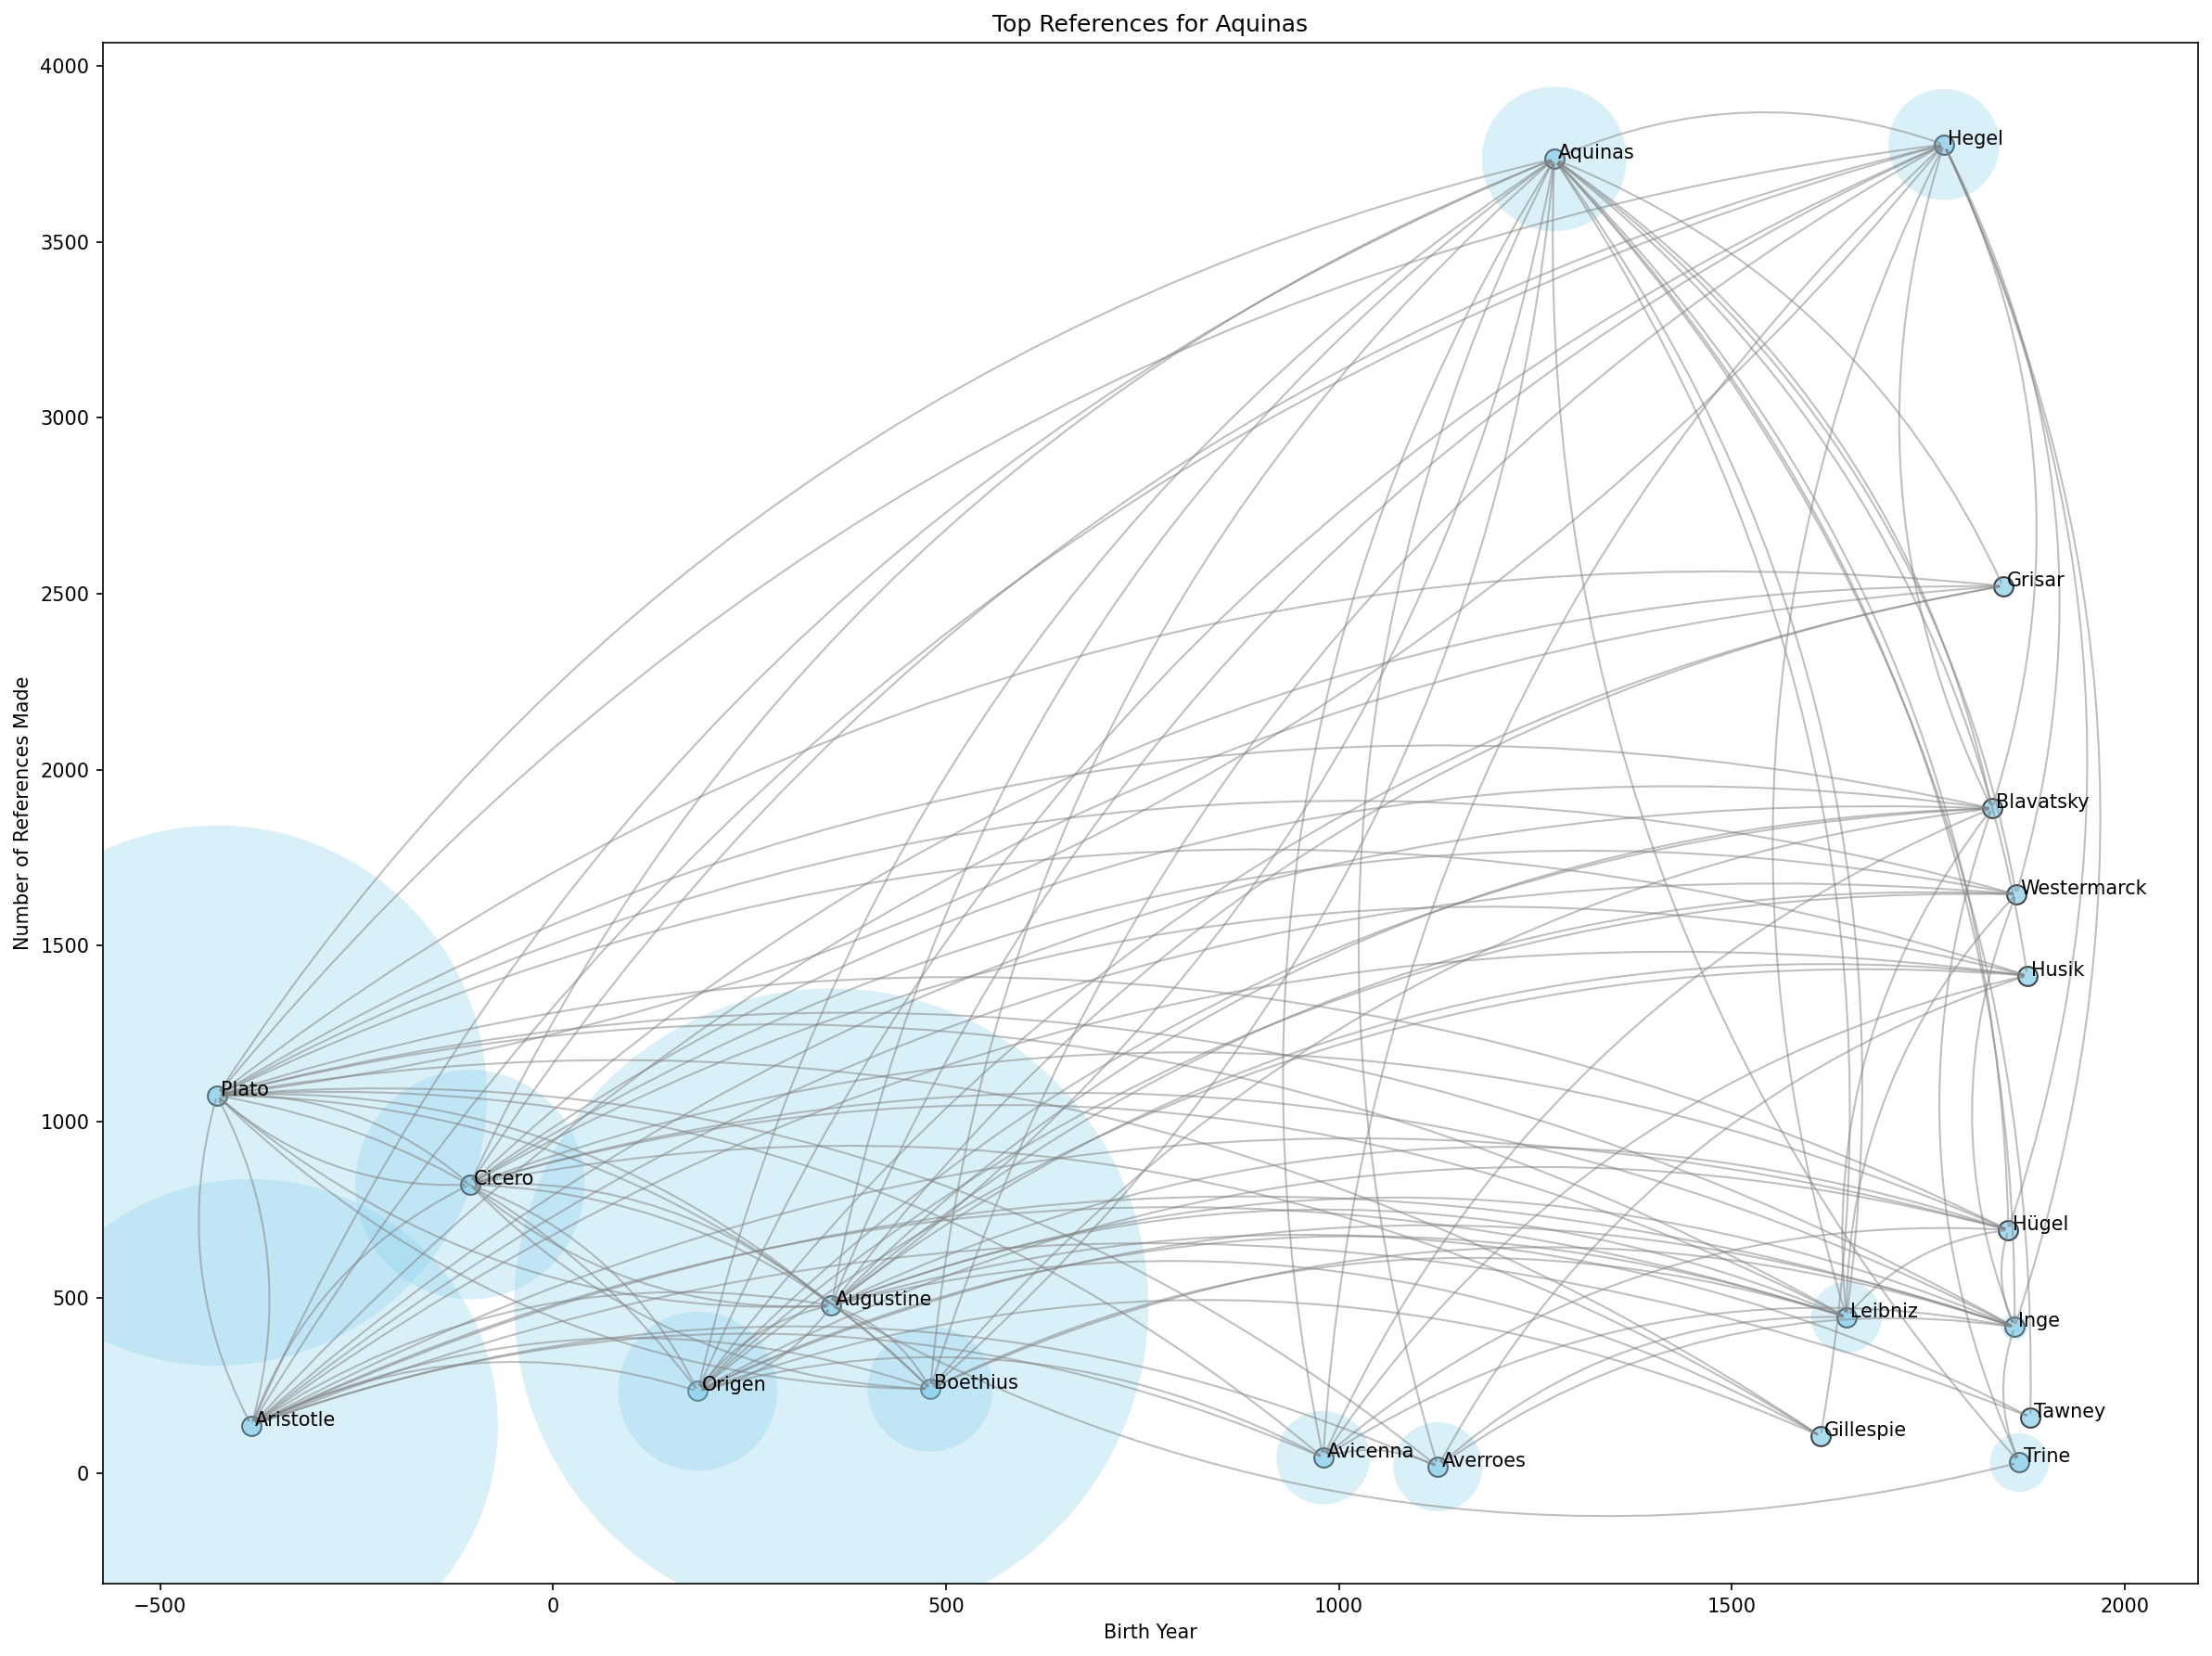

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import clear_output, display

# Load the CSV file
df = pd.read_csv('references.csv')

# Parse birth year from the 'birth_death' column, handling negative years
df['birth_year'] = df['birth_death'].str.extract(r'(-?\d{3,4})').astype(float)

# Define the function to plot references interactively
def plot_references(philosopher, top_references=10, top_referenced_by=10, threshold=1):

    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(16, 12), dpi=150)
    df_philosopher = df[df['author_of_book'] == philosopher]
    top_referenced = df_philosopher['full_author_referenced'].value_counts().head(top_references).index
    top_referenced_by_philosophers = df[df['full_author_referenced'] == philosopher]['author_of_book'].value_counts().head(top_referenced_by).index
    display_philosophers = list(set(top_referenced).union(set(top_referenced_by_philosophers), {philosopher}))
    df_display = df[(df['author_of_book'].isin(display_philosophers)) & (df['full_author_referenced'].isin(display_philosophers))]
    restricted_referenced_counts = df_display['full_author_referenced'].value_counts()
    reference_counts = df['author_of_book'].value_counts()
    coordinates = {}
    for philosopher_name in display_philosophers:
        philosopher_rows = df[df['author_of_book'] == philosopher_name]
        if not philosopher_rows.empty:
            birth_year = philosopher_rows['birth_year'].iloc[0]
            num_references_made = reference_counts.get(philosopher_name, 0)
            if pd.notna(birth_year) and np.isfinite(num_references_made):
                coordinates[philosopher_name] = (birth_year, num_references_made)


    for philosopher_name, (x, y) in coordinates.items():
        first_name = philosopher_name.split()[0].rstrip(',')
        
        # the primary point
        ax.scatter(x, y, s=100, c='skyblue', edgecolor='k', alpha=0.7)
        ax.text(x + 5, y, first_name, fontsize=10)


        if philosopher_name in restricted_referenced_counts:
            bubble_size = restricted_referenced_counts[philosopher_name] * 30
            ax.scatter(x, y, s=bubble_size, c='skyblue', alpha=0.3, edgecolor='none')  # Translucent bubble


    unique_connections = set()


    reference_counts_pairs = df_display.groupby(['author_of_book', 'full_author_referenced']).size()
    for (source, target), count in reference_counts_pairs.items():
        if source != target and count >= threshold and (source, target) not in unique_connections:
            unique_connections.add((source, target))

            if source in coordinates and target in coordinates:
                source_coord = coordinates[source]
                target_coord = coordinates[target]

                arrow = FancyArrowPatch(
                    posA=source_coord, posB=target_coord,
                    connectionstyle="arc3,rad=0.2",
                    arrowstyle="->,head_length=0.4,head_width=0.2", 
                    color='gray',
                    alpha=0.5,
                    linewidth=1
                )
                ax.add_patch(arrow)

    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel("Birth Year")
    ax.set_ylabel("Number of References Made")
    ax.set_title(f"Top References for {philosopher}")
    
    plt.tight_layout()

    display(fig)
    plt.close(fig)

#  widgets outside the plotting function
philosopher_widget = Dropdown(options=sorted(df['author_of_book'].unique()), description="Philosopher")
top_refs_widget = IntSlider(value=10, min=1, max=20, step=1, description="Top Referenced")
top_by_widget = IntSlider(value=10, min=1, max=20, step=1, description="Top Referenced By")
threshold_widget = IntSlider(value=1, min=1, max=10, step=1, description="Threshold")

# update function
def update(change):
    plot_references(
        philosopher_widget.value,
        top_refs_widget.value,
        top_by_widget.value,
        threshold_widget.value
    )


philosopher_widget.observe(update, names='value')
top_refs_widget.observe(update, names='value')
top_by_widget.observe(update, names='value')
threshold_widget.observe(update, names='value')

display(philosopher_widget, top_refs_widget, top_by_widget, threshold_widget)
plot_references(philosopher_widget.value, top_refs_widget.value, top_by_widget.value, threshold_widget.value)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch



def plot_top_references(philosopher, top_references=10, top_referenced_by=10, threshold=1):

    df_philosopher = df[df['author_of_book'] == philosopher]
    top_referenced = df_philosopher['full_author_referenced'].value_counts().head(top_references).index
    top_referenced_by = df[df['full_author_referenced'] == philosopher]['author_of_book'].value_counts().head(top_referenced_by).index
    display_philosophers = list(set(top_referenced).union(set(top_referenced_by), {philosopher}))
    df_display = df[(df['author_of_book'].isin(display_philosophers)) & (df['full_author_referenced'].isin(display_philosophers))]
    reference_counts = df_display['full_author_referenced'].value_counts()

    # Threshold
    connection_counts = df_display.groupby(['author_of_book', 'full_author_referenced']).size()
    filtered_counts = connection_counts[connection_counts >= threshold]


    coordinates = {}
    for philosopher_name in display_philosophers:
        philosopher_rows = df[df['author_of_book'] == philosopher_name]
        birth_year = philosopher_rows['birth_year'].iloc[0] if not philosopher_rows.empty else np.nan
        num_references_made = df[df['author_of_book'] == philosopher_name].shape[0]

        if pd.notna(birth_year):
            coordinates[philosopher_name] = (birth_year, num_references_made)


    sorted_coordinates = dict(sorted(coordinates.items(), key=lambda item: (item[1][0], item[1][1])))
    plt.figure(figsize=(16, 12), dpi=200)


    for referenced_philosopher, (x, y) in sorted_coordinates.items():
        first_name = referenced_philosopher.split()[0].rstrip(',')
        plt.scatter(x, y, s=100, c='skyblue', edgecolor='k', alpha=0.7)
        plt.text(x + 2, y, first_name, fontsize=10)
        bubble_size = reference_counts.get(referenced_philosopher, 0) * 30
        plt.scatter(x, y, s=bubble_size, c='skyblue', alpha=0.3, edgecolor='none')

    # plot the main philosopher's bubble and label
    source_birth_year = df[df['author_of_book'] == philosopher]['birth_year'].iloc[0]
    source_references_made = df[df['author_of_book'] == philosopher].shape[0]
    main_bubble_size = reference_counts.get(philosopher, 0) * 30  # Based on total references to the main philosopher
    plt.scatter(source_birth_year, source_references_made, s=main_bubble_size, c='orange', edgecolor='k', alpha=0.7)
    plt.text(source_birth_year + 2, source_references_made, philosopher.split()[0], fontsize=12, color='orange')

    unique_connections = set()

    for (source, target), count in filtered_counts.items():
        if source != target and (source, target) not in unique_connections:
            unique_connections.add((source, target))
            
            if source in coordinates and target in coordinates:
                source_coord = coordinates[source]
                target_coord = coordinates[target]
                
                arrow = FancyArrowPatch(
                    posA=source_coord, posB=target_coord,
                    connectionstyle="arc3,rad=0.2", 
                    arrowstyle="->,head_length=0.4,head_width=0.2",
                    color='k',
                    alpha=0.5,
                    linewidth=1
                )
                plt.gca().add_patch(arrow)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Birth Year")
    plt.ylabel("Number of References Made")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

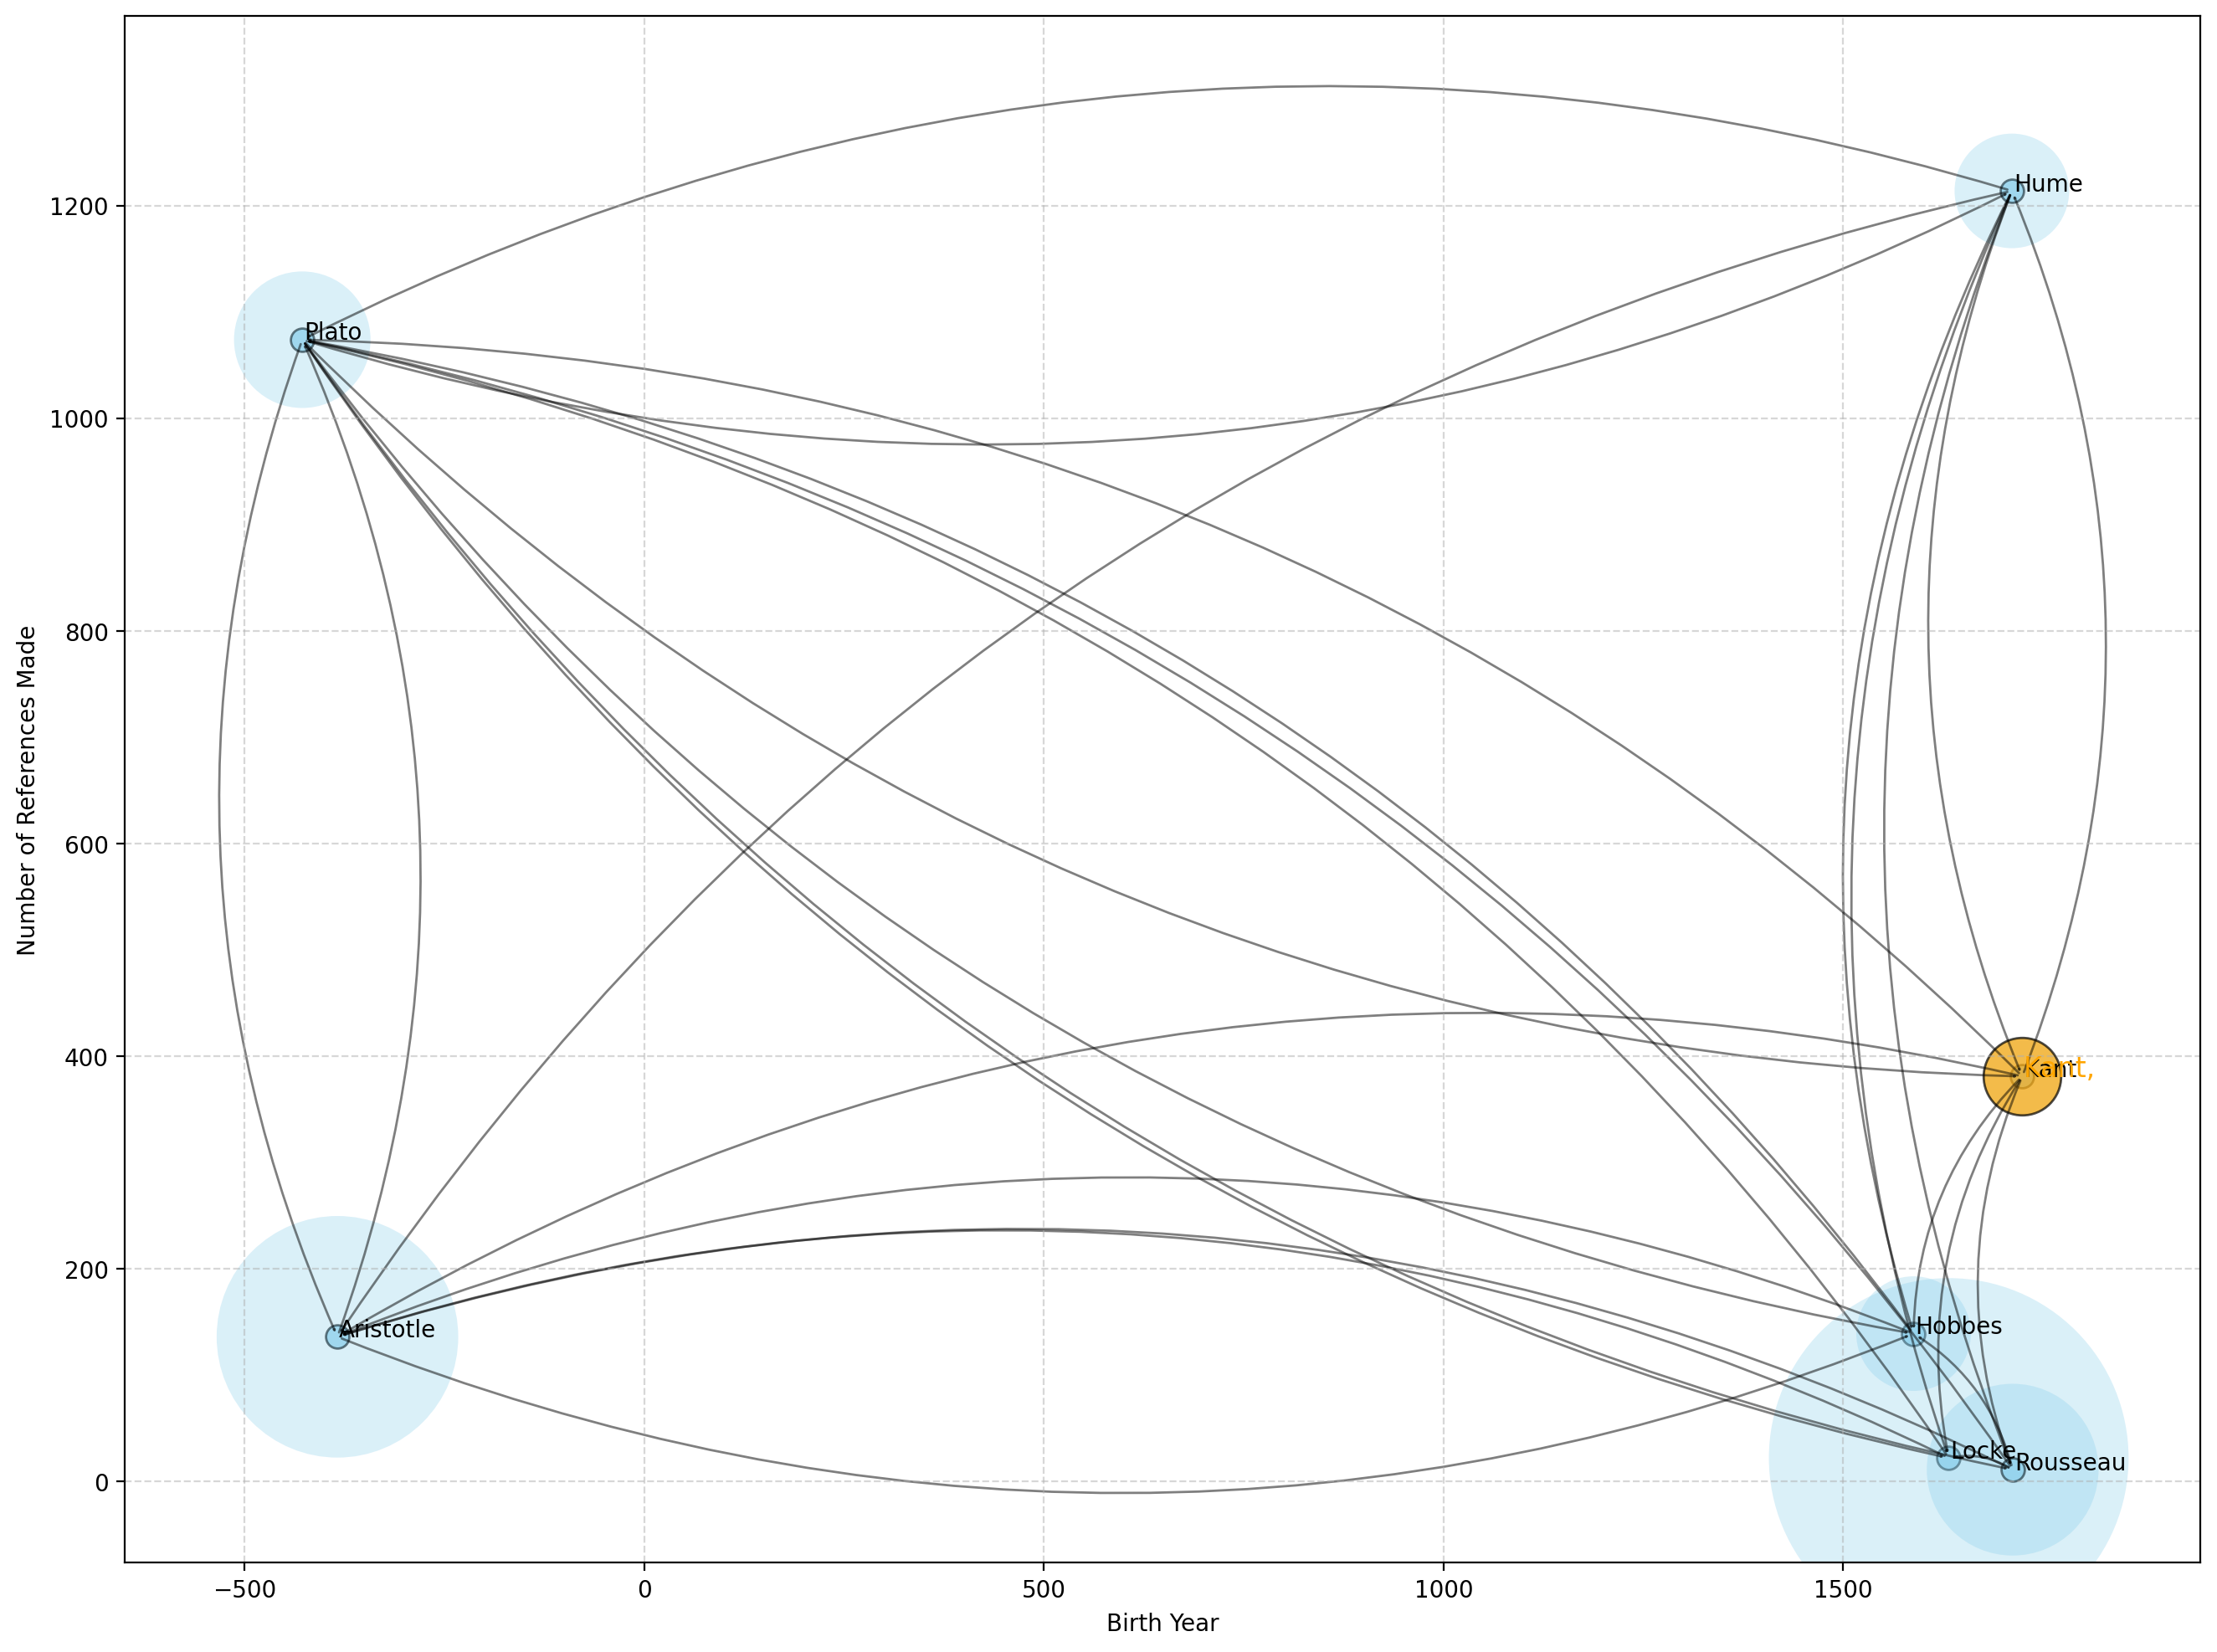

In [3]:
plot_top_references('Kant, Immanuel', top_references=6, top_referenced_by=0)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv('references.csv')
df['birth_year'] = df['birth_death'].str.extract(r'(-?\d{3,4})').astype(float)

def plot_top_references_interactive(philosopher, top_references=10, top_referenced_by=10, threshold=1):
    df_philosopher = df[df['author_of_book'] == philosopher]
    top_referenced = df_philosopher['full_author_referenced'].value_counts().head(top_references).index
    top_referenced_by = df[df['full_author_referenced'] == philosopher]['author_of_book'].value_counts().head(top_referenced_by).index
    display_philosophers = list(set(top_referenced).union(set(top_referenced_by), {philosopher}))
    df_display = df[(df['author_of_book'].isin(display_philosophers)) & (df['full_author_referenced'].isin(display_philosophers))]
    reference_counts = df_display['full_author_referenced'].value_counts()
    connection_counts = df_display.groupby(['author_of_book', 'full_author_referenced']).size()
    filtered_counts = connection_counts[connection_counts >= threshold]

    coordinates = {}
    for philosopher_name in display_philosophers:
        philosopher_rows = df[df['author_of_book'] == philosopher_name]
        birth_year = philosopher_rows['birth_year'].iloc[0] if not philosopher_rows.empty else np.nan
        num_references_made = df[df['author_of_book'] == philosopher_name].shape[0]
        if pd.notna(birth_year):
            coordinates[philosopher_name] = (birth_year, num_references_made)

    main_birth_year = coordinates[philosopher][0]
    closest_intervals = [round(main_birth_year / 100) * 100 + offset for offset in (-200, 0, 200)]
    extended_intervals = []
    for i in range(1, 4):
        extended_intervals.append(closest_intervals[0] - i * 2000)
        extended_intervals.append(closest_intervals[-1] + i * 2000)
    x_ticks = sorted(set(closest_intervals + extended_intervals))
    x_tick_values = np.linspace(-2, 2, len(x_ticks))

    scatter_data = []
    base_bubble_size = 20
    scaling_factor = 30

    for philosopher_name, (birth_year, num_references_made) in coordinates.items():
        x_scaled = np.interp(birth_year, x_ticks, x_tick_values)
        y_scaled = num_references_made / 500 if num_references_made <= 2000 else 4 + (num_references_made - 2000) / 4000
        bubble_size = base_bubble_size + scaling_factor * reference_counts.get(philosopher_name, 0)
        scatter_data.append({
            'Philosopher': philosopher_name,
            'Birth Year (Scaled)': x_scaled,
            'References Made (Scaled)': y_scaled,
            'Bubble Size': bubble_size,
            'Original Birth Year': birth_year,
            'Original References Made': num_references_made
        })
    scatter_df = pd.DataFrame(scatter_data)

    fig = px.scatter(
        scatter_df,
        x='Birth Year (Scaled)',
        y='References Made (Scaled)',
        size='Bubble Size',
        size_max=60,
        color='Original Birth Year',
        hover_name='Philosopher',
        hover_data={'Original Birth Year': True, 'Original References Made': True},
        color_continuous_scale=px.colors.sequential.Magma,
        labels={'Original Birth Year': 'Birth Year', 'Original References Made': 'References Made'}
    )

    y_ticks = [0, 500, 1000, 1500, 2000, 6000, 10000, 14000]
    y_tick_values = []
    for tick in y_ticks:
        if tick <= 2000:
            y_tick_values.append(tick / 500)
        else:
            y_tick_values.append(4 + (tick - 2000) / 4000)
    max_y_scaled = max(y_tick_values)
    fig.update_yaxes(
        tickvals=y_tick_values,
        ticktext=y_ticks,
        title="References Made",
        range=[-0.5, max_y_scaled]
    )
    fig.update_xaxes(
        tickvals=x_tick_values,
        ticktext=x_ticks,
        title="Birth Year"
    )

    for (source, target), count in filtered_counts.items():
        if source in coordinates and target in coordinates:
            source_birth_year, source_references = coordinates[source]
            target_birth_year, target_references = coordinates[target]
            source_x_scaled = np.interp(source_birth_year, x_ticks, x_tick_values)
            target_x_scaled = np.interp(target_birth_year, x_ticks, x_tick_values)
            source_y_scaled = source_references / 500 if source_references <= 2000 else 4 + (source_references - 2000) / 4000
            target_y_scaled = target_references / 500 if target_references <= 2000 else 4 + (target_references - 2000) / 4000
            fig.add_trace(go.Scatter(
                x=[source_x_scaled, target_x_scaled],
                y=[source_y_scaled, target_y_scaled],
                mode="lines",
                line=dict(color="gray", width=1),
                opacity=0.5,
                showlegend=False
            ))

    fig.update_layout(
        title=f"Top References for {philosopher}",
        hovermode="closest"
    )
    fig.show()

plot_top_references_interactive('Plato', top_references=5, top_referenced_by=5, threshold=3)

In [54]:
plot_top_references_interactive('Kant, Immanuel', top_references=5, top_referenced_by=5, threshold=100)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from ipywidgets import interact

df = pd.read_csv('references.csv')
df['birth_year'] = df['birth_death'].str.extract(r'(-?\d{3,4})').astype(float)

def plot_top_references_interactive(philosopher, top_references=10, top_referenced_by=10, threshold=1):
    df_philosopher = df[df['author_of_book'] == philosopher]
    top_referenced = df_philosopher['full_author_referenced'].value_counts().head(top_references).index
    top_referenced_by = df[df['full_author_referenced'] == philosopher]['author_of_book'].value_counts().head(top_referenced_by).index
    display_philosophers = list(set(top_referenced).union(set(top_referenced_by), {philosopher}))
    df_display = df[(df['author_of_book'].isin(display_philosophers)) & (df['full_author_referenced'].isin(display_philosophers))]
    reference_counts = df_display['full_author_referenced'].value_counts()
    connection_counts = df_display.groupby(['author_of_book', 'full_author_referenced']).size()
    filtered_counts = connection_counts[connection_counts >= threshold]

    coordinates = {}
    for philosopher_name in display_philosophers:
        philosopher_rows = df[df['author_of_book'] == philosopher_name]
        birth_year = philosopher_rows['birth_year'].iloc[0] if not philosopher_rows.empty else np.nan
        num_references_made = df[df['author_of_book'] == philosopher_name].shape[0]
        if pd.notna(birth_year):
            coordinates[philosopher_name] = (birth_year, num_references_made)

    main_birth_year = coordinates[philosopher][0]
    closest_intervals = [round(main_birth_year / 100) * 100 + offset for offset in (-200, 0, 200)]
    extended_intervals = []
    for i in range(1, 4):
        extended_intervals.append(closest_intervals[0] - i * 2000)
        extended_intervals.append(closest_intervals[-1] + i * 2000)
    x_ticks = sorted(set(closest_intervals + extended_intervals))
    x_tick_values = np.linspace(-2, 2, len(x_ticks))

    scatter_data = []
    base_bubble_size = 20
    scaling_factor = 30

    for philosopher_name, (birth_year, num_references_made) in coordinates.items():
        x_scaled = np.interp(birth_year, x_ticks, x_tick_values)
        y_scaled = num_references_made / 500 if num_references_made <= 2000 else 4 + (num_references_made - 2000) / 4000
        bubble_size = base_bubble_size + scaling_factor * reference_counts.get(philosopher_name, 0)
        scatter_data.append({
            'Philosopher': philosopher_name,
            'Birth Year (Scaled)': x_scaled,
            'References Made (Scaled)': y_scaled,
            'Bubble Size': bubble_size,
            'Original Birth Year': birth_year,
            'Original References Made': num_references_made
        })
    scatter_df = pd.DataFrame(scatter_data)

    fig = px.scatter(
        scatter_df,
        x='Birth Year (Scaled)',
        y='References Made (Scaled)',
        size='Bubble Size',
        size_max=60,
        color='Original Birth Year',
        hover_name='Philosopher',
        hover_data={'Original Birth Year': True, 'Original References Made': True},
        color_continuous_scale=px.colors.sequential.Magma,
        labels={'Original Birth Year': 'Birth Year', 'Original References Made': 'References Made'}
    )

    y_ticks = [0, 500, 1000, 1500, 2000, 6000, 10000, 14000]
    y_tick_values = []
    for tick in y_ticks:
        if tick <= 2000:
            y_tick_values.append(tick / 500)
        else:
            y_tick_values.append(4 + (tick - 2000) / 4000)
    max_y_scaled = max(y_tick_values)
    fig.update_yaxes(
        tickvals=y_tick_values,
        ticktext=y_ticks,
        title="References Made",
        range=[-0.5, max_y_scaled]
    )
    fig.update_xaxes(
        tickvals=x_tick_values,
        ticktext=x_ticks,
        title="Birth Year"
    )

    for (source, target), count in filtered_counts.items():
        if source in coordinates and target in coordinates:
            source_birth_year, source_references = coordinates[source]
            target_birth_year, target_references = coordinates[target]
            source_x_scaled = np.interp(source_birth_year, x_ticks, x_tick_values)
            target_x_scaled = np.interp(target_birth_year, x_ticks, x_tick_values)
            source_y_scaled = source_references / 500 if source_references <= 2000 else 4 + (source_references - 2000) / 4000
            target_y_scaled = target_references / 500 if target_references <= 2000 else 4 + (target_references - 2000) / 4000
            fig.add_trace(go.Scatter(
                x=[source_x_scaled, target_x_scaled],
                y=[source_y_scaled, target_y_scaled],
                mode="lines",
                line=dict(color="gray", width=1),
                opacity=0.5,
                showlegend=False
            ))

    fig.update_layout(
        title=f"Top References for {philosopher}",
        hovermode="closest"
    )
    fig.show()

philosopher_options = df['author_of_book'].unique()

interact(
    plot_top_references_interactive,
    philosopher=philosopher_options,
    top_references=(1, 10, 1),
    top_referenced_by=(1, 10, 1)
)


interactive(children=(Dropdown(description='philosopher', options=('Buchanan', 'Higginson, Thomas Wentworth', …

<function __main__.plot_top_references_interactive(philosopher, top_references=10, top_referenced_by=10, threshold=1)>